In [293]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zoo-animal-classification/class.csv
/kaggle/input/zoo-animal-classification/zoo.csv


In [294]:
# importing the libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline
import plotly.express as px

In [295]:
# loading the datset
data=pd.read_csv("/kaggle/input/zoo-animal-classification/zoo.csv")
data


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [296]:
data.shape

(101, 18)

the data consist of 101 observations and 18 columns 



**1. Data Prepocessing
* Evaluate the missing values and duplicates
* Set the features and target
* Check data type
* Train-Test-Split**

In [297]:
data.isnull().sum() # checking the null values in the dataset

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [298]:
data.nunique()

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
class_type       7
dtype: int64

In [299]:

#check if there are duplicates in animal_name
duplicates = data.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [300]:
frog = data.loc[data['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [301]:


data["animal_name"][(data.animal_name == 'frog')&(data.venomous==1)]="frog_venomous"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [302]:
data["class_type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [303]:
data1=data["class_type"].replace(1,"Mammals").replace(2,"Bird").replace(3,"Reptile").replace(4,"Fish").replace(5,"Amphibian").replace(6,"Bug").replace(7,"Invertebrate")
           

In [304]:
data1

0           Mammals
1           Mammals
2              Fish
3           Mammals
4           Mammals
           ...     
96          Mammals
97              Bug
98          Mammals
99     Invertebrate
100            Bird
Name: class_type, Length: 101, dtype: object

In [305]:
zoo = pd.merge(data,data1,left_index=True,right_index=True)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type_x,class_type_y
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammals
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammals
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammals


In [306]:
df=zoo.drop("class_type_x",axis=1)

In [307]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type_y
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammals
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammals
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammals
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate


Since it is a ditochomous data we cannot compute correlation .So in order to check the relation of the variables with their class type we use hypothesis i.e chi-square test.

In [308]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['class_type'], data['hair'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 85.0381794355233
p-value: 3.241550711414804e-16
Degrees of freedom: 6
Expected frequencies: [[23.54455446 17.45544554]
 [11.48514851  8.51485149]
 [ 2.87128713  2.12871287]
 [ 7.46534653  5.53465347]
 [ 2.2970297   1.7029703 ]
 [ 4.59405941  3.40594059]
 [ 5.74257426  4.25742574]]


The null hypothesis of the test is that there is no association between the class type and the hair type. If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant association between the class type and the hair type in the dataset.

In [309]:
contingency_table = pd.crosstab(data['class_type'], data['legs'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 241.7289361231522
p-value: 5.942172597812372e-35
Degrees of freedom: 30
Expected frequencies: [[ 9.33663366 10.96039604 15.42574257  0.40594059  4.05940594  0.81188119]
 [ 4.55445545  5.34653465  7.52475248  0.1980198   1.98019802  0.3960396 ]
 [ 1.13861386  1.33663366  1.88118812  0.04950495  0.4950495   0.0990099 ]
 [ 2.96039604  3.47524752  4.89108911  0.12871287  1.28712871  0.25742574]
 [ 0.91089109  1.06930693  1.5049505   0.03960396  0.3960396   0.07920792]
 [ 1.82178218  2.13861386  3.00990099  0.07920792  0.79207921  0.15841584]
 [ 2.27722772  2.67326733  3.76237624  0.0990099   0.99009901  0.1980198 ]]


In [310]:
plt.style.use("dark_background")#to set the background color
plt.rcParams["figure.figsize"]=[12,6]# setting the graph size

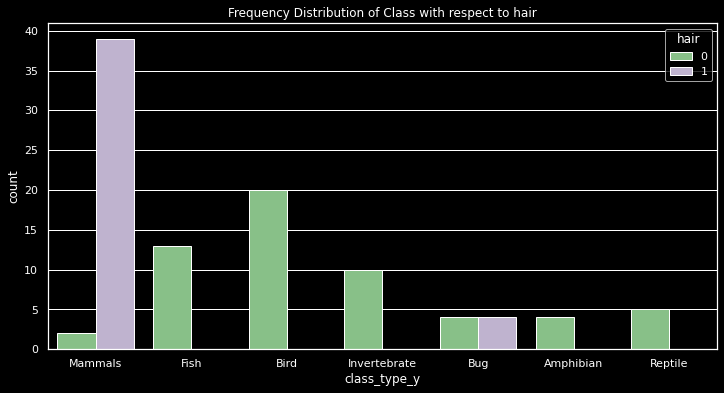

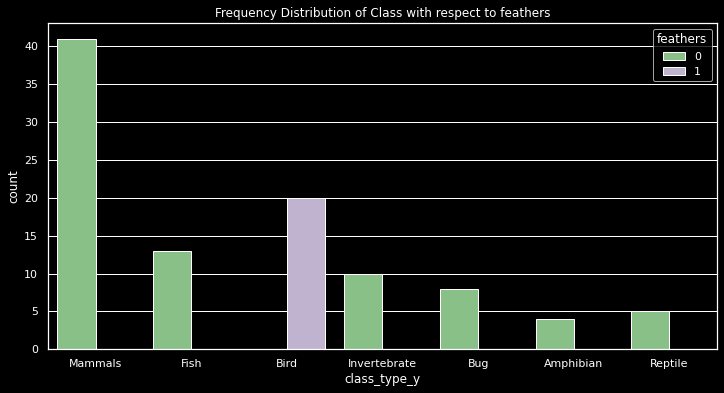

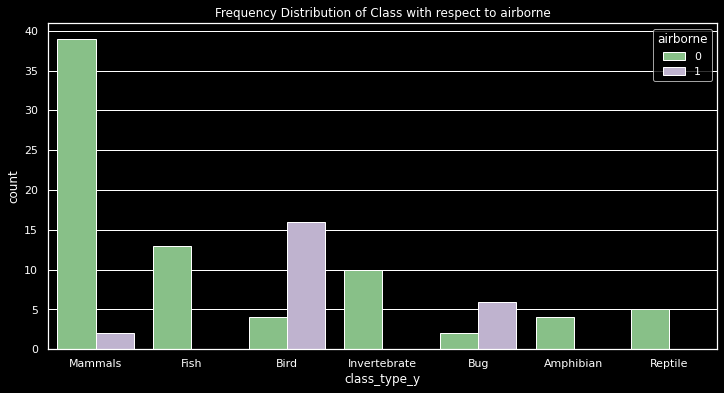

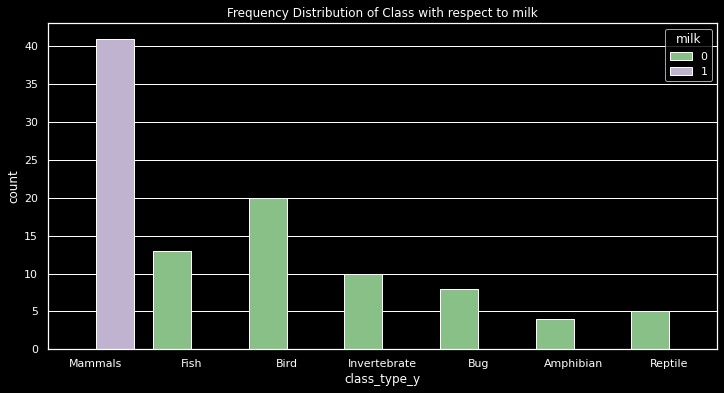

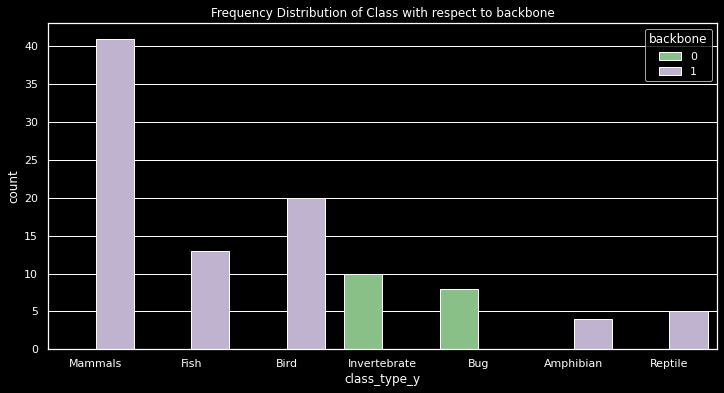

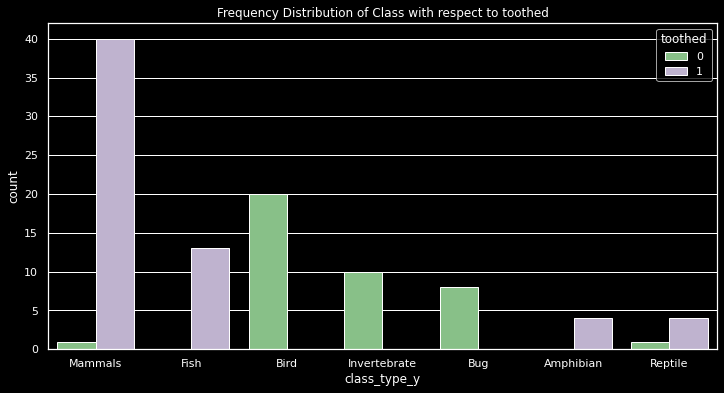

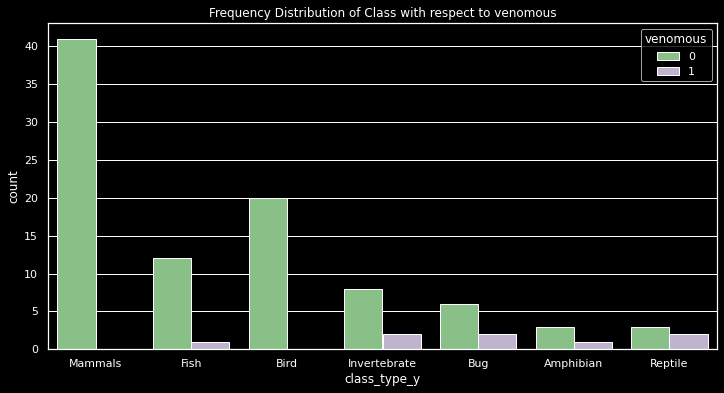

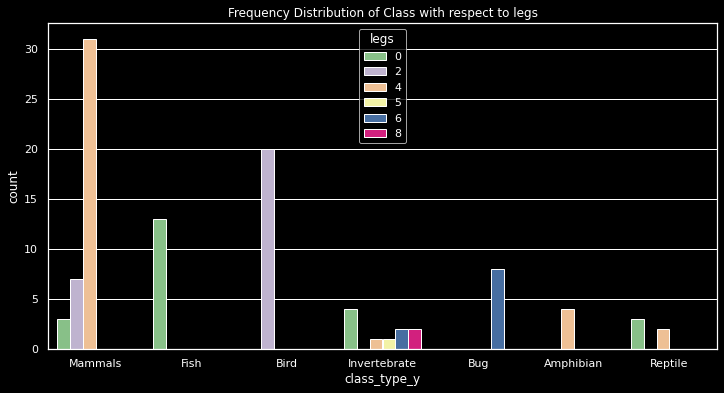

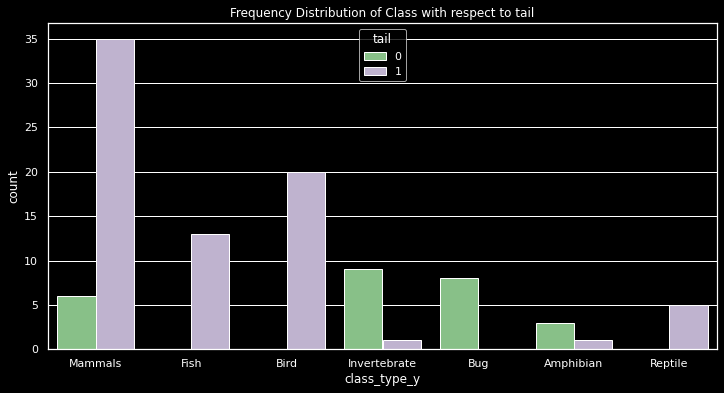

In [311]:
# visulisation  
for hue in ["hair", "feathers", "airborne", "milk", "backbone", "toothed", "venomous", "legs", "tail"]:  
    sns.countplot(data = zoo, x = "class_type_y", hue = hue, palette = "Accent")
    plt.title(f"Frequency Distribution of Class with respect to {hue}")
    plt.show()

Conclusion from the graphs:
1:Most of the  Mammals and 50% of the Bug have legs .
2:


<AxesSubplot:xlabel='class_type_y', ylabel='count'>

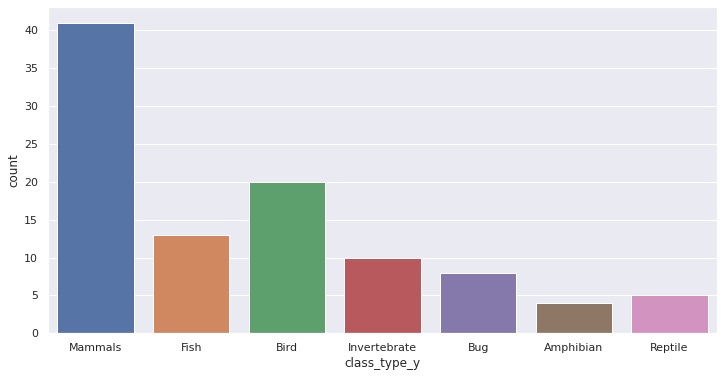

In [312]:
sns.set_theme(style="darkgrid")
#use seaborn to plot the count of each 7 class_type
sns.countplot(x='class_type_y',saturation=.80, data=zoo)

In [313]:
label=["Mammal","Bird","Fish","Invertebrate","Bug","Reptile","Amphibian"]
values = zoo['class_type_y'].value_counts()

px.pie(zoo,values=values,labels=label,title="Animal Class Type Distribution Pie Chart")

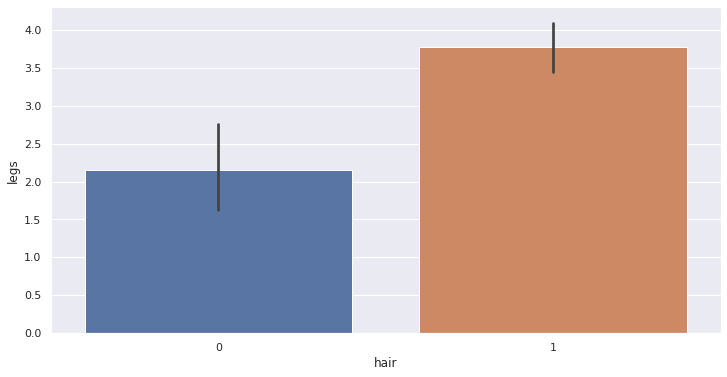

In [314]:
sns.barplot(x="hair",y="legs",data=data);

In [315]:
df.shape

(101, 18)

**2:Training and testing the data
* Decision Tree
* Random Forest
* Logistic Regression
* K-Nearest Neighbors**

In [316]:
features = list(df.columns)
print(features)
     

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type_y']


In [317]:
features.remove('class_type_y')
features.remove('animal_name')

print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [318]:
X = df[features]
Y = df.class_type_y
print(X.shape)
print(Y.shape)
     

(101, 16)
(101,)


In [319]:
# split train test data into 80/20.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

# **1:LOGISTIC REGRESSION **

In [360]:

#Using Logistic Regression to Solve the Problem

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0,solver="lbfgs",multi_class="ovr")


In [361]:
len(X_train)

80

In [362]:
len(X_test)

21

In [363]:
#fitting he model
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [364]:
model.predict(X_test)

array(['Mammals', 'Mammals', 'Fish', 'Bird', 'Invertebrate', 'Amphibian',
       'Mammals', 'Bird', 'Amphibian', 'Fish', 'Bird', 'Bird', 'Bug',
       'Bug', 'Fish', 'Mammals', 'Mammals', 'Mammals', 'Mammals',
       'Invertebrate', 'Mammals'], dtype=object)

In [365]:
model.score(X_test,y_test)

0.9523809523809523

In [366]:
a=model.predict_proba(X_test)

In [367]:
# this is what the training dataset looks like
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0
37,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0


In [368]:
from sklearn import metrics
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0]
 [1 0 0 0 0 0 0]]


Text(84.5, 0.5, 'true')

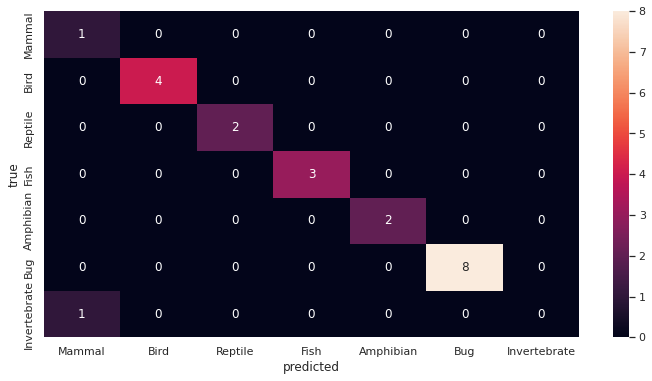

In [369]:
# Define labels for the matrix
labels = ["Mammal", "Bird", "Reptile", "Fish","Amphibian","Bug","Invertebrate"]

sns.heatmap(cm,annot=True,xticklabels=labels, yticklabels=labels)
plt.xlabel("predicted")
plt.ylabel("true")

conclusion:


In [370]:
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 0.9875
testing accuracy : 0.9523809523809523


In [371]:
scores=[]
score=model.score(X_test, y_test)
scores.append(score)

# 2:K-NEAREST NEIGHBORS

In [372]:
# from sklearn.family_name import model
from sklearn.neighbors import KNeighborsClassifier

In [373]:

# Declare the model
clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
score

0.9047619047619048

In [374]:
pred=clf.predict(X_test)

In [375]:
clf.score(X_test,y_test)

0.9047619047619048

In [376]:
#use cross validation score since this is a small size dataset 
#Get cross validation score of K-Nearest Neighbors

from sklearn.model_selection import cross_val_score


cv_scores = [] # store cross vadidation score of all the algorithms.

score_knn=cross_val_score(clf, X,Y, cv=10)

print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.88 (+/- 0.12) with k value equals to 3


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.



In [377]:
scores.append(score)

In [378]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [379]:
print(confusion_matrix(y_test,pred))

[[1 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 0 0 0 8 0]
 [1 0 0 0 0 0 0]]


In [380]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   Amphibian       0.33      1.00      0.50         1
        Bird       1.00      1.00      1.00         4
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         3
Invertebrate       1.00      0.50      0.67         2
     Mammals       1.00      1.00      1.00         8
     Reptile       0.00      0.00      0.00         1

    accuracy                           0.90        21
   macro avg       0.76      0.79      0.74        21
weighted avg       0.92      0.90      0.90        21



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [381]:
# error_rate=[]
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

# 3:DECISION TREE

In [382]:
from sklearn.tree import DecisionTreeClassifier

In [383]:

dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [384]:
y_pred1= dt.predict(X_test) # making prediction 
y_pred1

array(['Mammals', 'Mammals', 'Fish', 'Bird', 'Invertebrate', 'Reptile',
       'Mammals', 'Bird', 'Amphibian', 'Fish', 'Bird', 'Bird',
       'Invertebrate', 'Bug', 'Fish', 'Mammals', 'Mammals', 'Mammals',
       'Mammals', 'Invertebrate', 'Mammals'], dtype=object)

In [385]:
score=accuracy_score( y_pred1,y_test) 
score
scores.append(score)

In [386]:
print(confusion_matrix(y_test, y_pred)) 

[[1 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 0 0 0 8 0]
 [1 0 0 0 0 0 0]]


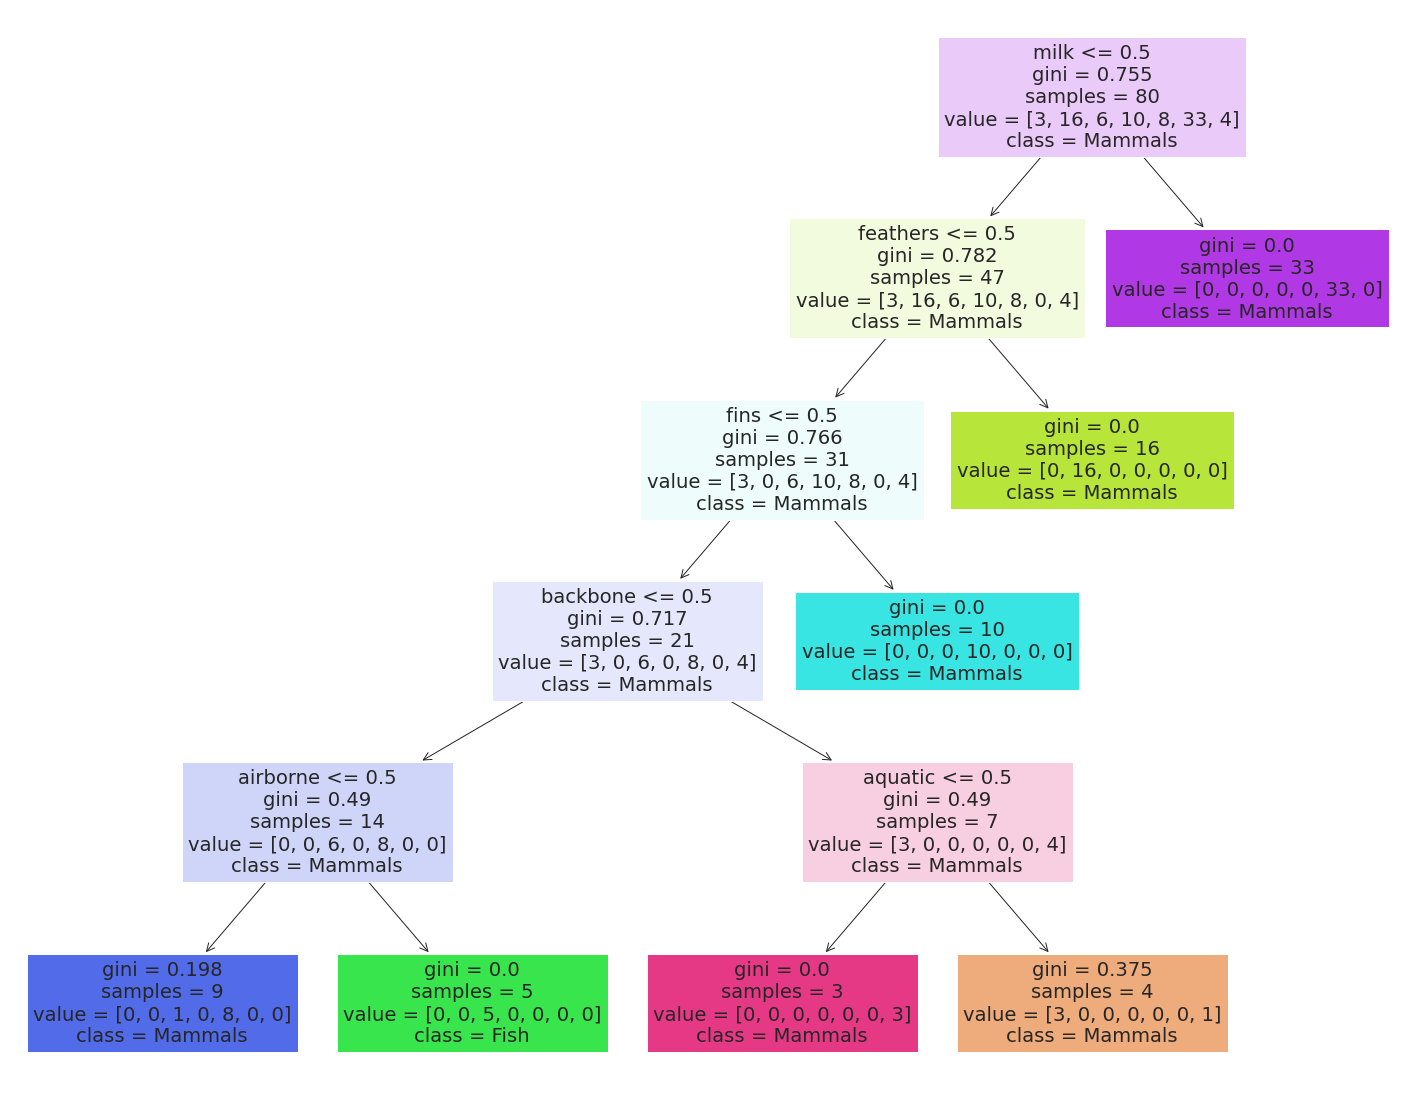

In [387]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(dt, feature_names = features, class_names = zoo["class_type_y"], filled = True, rounded = False)

plt.savefig('tree_visualization.png') 

# 4:RANDOM FOREST 

In [388]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0,n_estimators=25)
model.fit(X_train, y_train)
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 1.0
testing accuracy : 1.0


In [389]:
y_pred_RandomForestClassifier = model.predict(X_test)
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
score
scores.append(score)


In [397]:
#Get cross validation score of random forest model
score_forest=cross_val_score(clf, X,Y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_score

Random Forest Accuracy: 0.88 (+/- 0.12)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.



0.8809090909090909

# 5:NAIVE BAYES

In [391]:
from sklearn.naive_bayes import BernoulliNB

In [392]:

print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))


NaiveBayes
Acurracy:  1.0


In [393]:
score=clf_nb.score(X_test,y_test)
scores.append(score)

In [394]:

from matplotlib.colors import ListedColormap

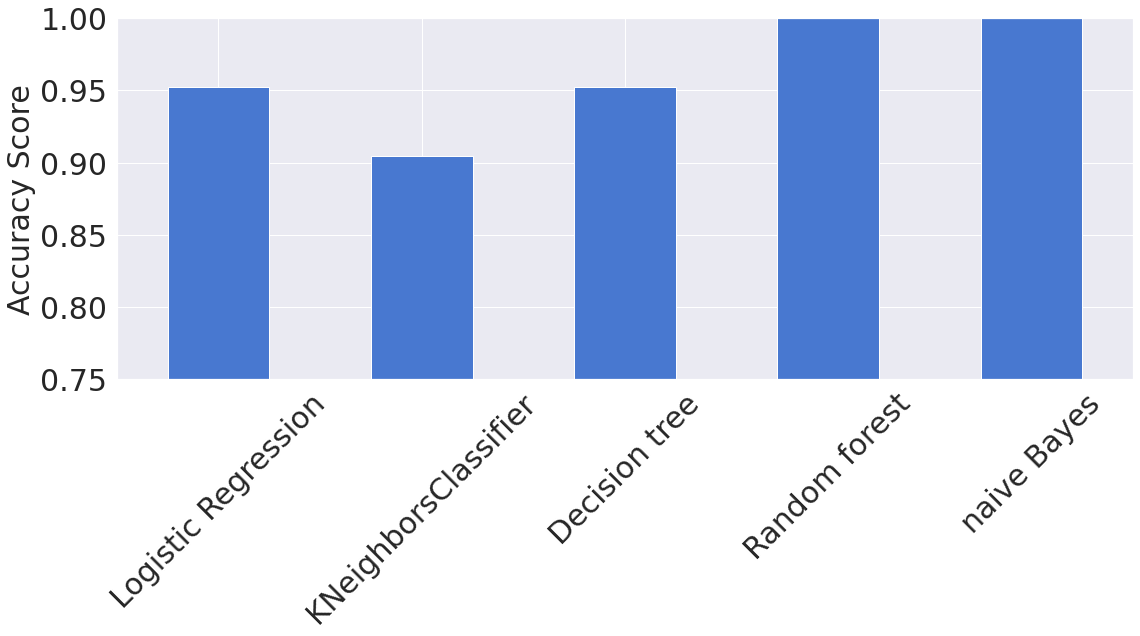

In [395]:

Acc_scores = pd.Series(scores, ['Logistic Regression','KNeighborsClassifier','Decision tree', 'Random forest','naive Bayes'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



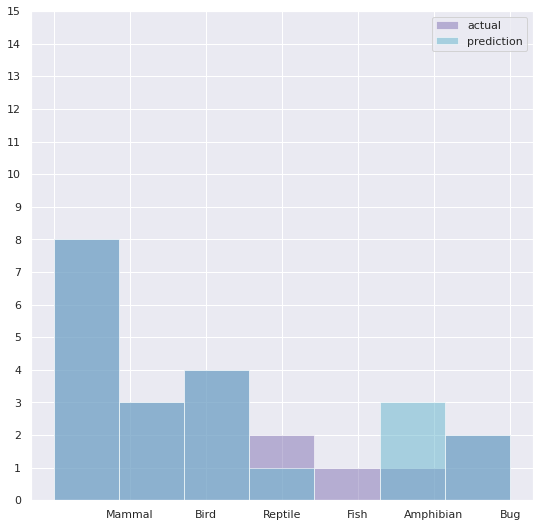

In [396]:
y_pred=model1.predict(X_test)
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,16))
labels = ["","Mammal","Bird","Reptile","Fish","Amphibian","Bug","Invertebrate"]
ax.set_xticklabels(labels)
ax.legend(loc = 'best')
plt.show()